# Import  Necessery Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Loading the Dateset

In [2]:
# Load or bring up the train and test data
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')


In [3]:
# Display the first 5 rows of the training data
train_dataset.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


In [4]:
# Display the first 5 rows of the testing data
test_dataset.head()

,id_,source,email
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,5,Subject: get me thru july newsletter\nthe get ...
1,cbe49c1c-b328-4716-9b78-9169c6111e80,4,Subject: looking for a good match to take out ...
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,4,"Subject: fw : besides our special pricing , yo..."
3,b696569e-f7de-4771-9946-be5dd477b2f6,5,Subject: access to mary solmonson ' s e - mail...
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,2,Subject: software should be easy to use !\nsev...


# Data Preprocessing

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_     15000 non-null  object
 1   source  15000 non-null  int64 
 2   email   15000 non-null  object
 3   class   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


### *Checking the missing values in the dataset*


In [6]:
train_dataset.isnull().sum()

,0
id_,0
source,0
email,0
class,0


In [7]:
train_dataset

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam
...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,spam
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,spam
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,spam
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,not_spam


### *Check for duplicate values*


In [8]:
# Check for duplicate values
train_dataset.duplicated().sum()

0

### *Clean the email text: this function remove the special characters, extra space and coverting the text to lowercase*


In [9]:
# Clean the email text (special characters, extra space)
def clean_email_text(email_text):
    email_text = re.sub(r'\W', ' ', email_text)
    email_text = re.sub(r'\s+', ' ', email_text)
    email_text = email_text.lower().strip()
    return email_text

### *This clean_email_text() function applied to the email column to create new 'cleaned email text column'*

In [10]:
# Apply the clean_email_text function to the email column
train_dataset['cleaned email text'] = train_dataset['email'].apply(clean_email_text)

### *In class column indicates  whether an email is spam or not. Convert the class labels categorical values to numerical values (spam=1, not_spam=0) using Label Encoder*


In [11]:
# Convert the class labels categorical values to numerical values (spam=1, not_spam=0)
label_encoder = LabelEncoder()
train_dataset['class'] = label_encoder.fit_transform(train_dataset['class'])


In [12]:
train_dataset

,id_,source,email,class,cleaned email text
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,0,subject is the supply rebound beginning an upd...
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,1,subject email list 100 million addresses 79 ja...
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,1,subject alley dodecahedra suicide are you read...
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,0,subject ibuyit project i wanted to share some ...
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,1,subject cheap vicodin online us fda pharmacy h...
...,...,...,...,...,...
14995,606de7ad-bb1c-495f-94fc-eee43a48e6ed,4,Subject: fwd : need pills vali + u + m $ xia |...,1,subject fwd need pills vali u m xia nax vlagr ...
14996,a151d2f9-7ee1-4c2f-9de3-07f257a6fc86,5,Subject: you - the following ?\nv . i . p\nani...,1,subject you the following v i p animal lovers ...
14997,6762525f-5da5-4c84-a2ab-09136dfb6338,4,Subject: o . rde _ r the 2 . 4 ho . ur rock ha...,1,subject o rde _ r the 2 4 ho ur rock hard pill...
14998,6d2bc08d-2c40-4e7e-9c59-a836c4f0b31b,3,Subject: the ecc estate has this morning propo...,0,subject the ecc estate has this morning propos...


### *Data Spliting to prepare for model traing and split the train data into training and testing sets*


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_dataset['cleaned email text'], train_dataset['class'], test_size=0.2, random_state=42
)


### *Feature extraction with TF-IDF (Term Frequency-Inverse Document Frequency). It converts the cleaned email text to numerical features.*


In [14]:
# Feature extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

# Exploratory Data Analysis (EDA)

### *Distribution of spam (1) vs not_spam (0) emails. In this visualization represents the distribution of 1 (spam) vs. 0 (not_spam) emails in the training dataset and count plot is used to show the number of emails in each category.*


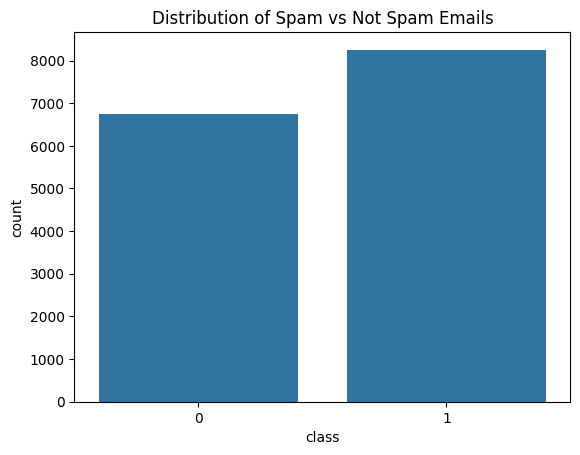

In [15]:
# Distribution of spam (1) vs not_spam (0) emails
sns.countplot(x='class', data=train_dataset)
plt.title('Distribution of Spam vs Not Spam Emails')
plt.show()

### *WordCloud Analysis for spam emails.  This below visualization generate a word cloud to represent the most common words in spam emails. In this visualization basically highlights key differences in vocabulary between spam and not_spam emails. It represents common words in spam emails include promotional terms like need, offer, and want.*


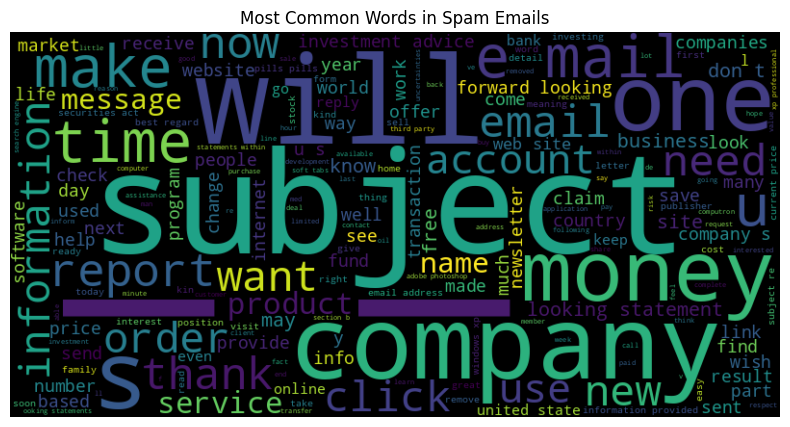

In [16]:
# WordCloud for spam emails
spam_words = ' '.join(train_dataset[train_dataset['class'] == 1]['cleaned email text'])
word_cloud = WordCloud(width=800, height=400).generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Emails')
plt.show()

### *WordCloud Analysis for not spam emails. This below visualization generate a word cloud to represent the most common words in not spam emails. It represents common words in not_spam emails include more formal and topic-specific terms. In this visualization basically highlights key differences in vocabulary between spam and not_spam emails.*

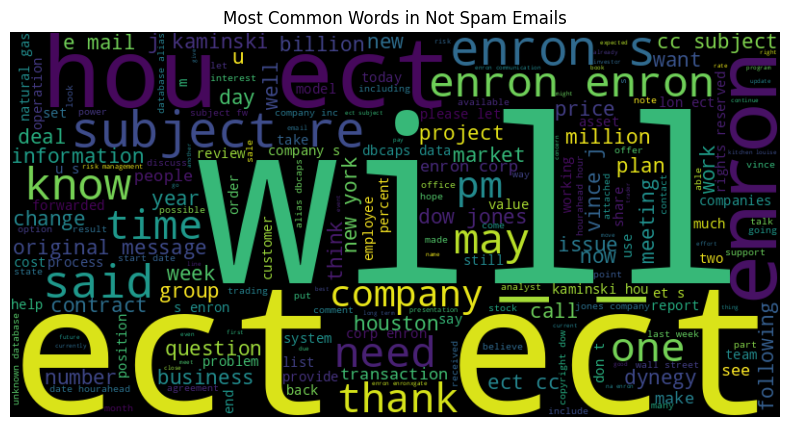

In [17]:
# WordCloud for not_spam emails
not_spam_words = ' '.join(train_dataset[train_dataset['class'] == 0]['cleaned email text'])
word_cloud = WordCloud(width=800, height=400).generate(not_spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Not Spam Emails')
plt.show()

### *This below represtentation shows the distribution of email lengths for spam vs. not_spam emails. It indicates whether spam emails tend to be shorter or longer than not_spam emails*

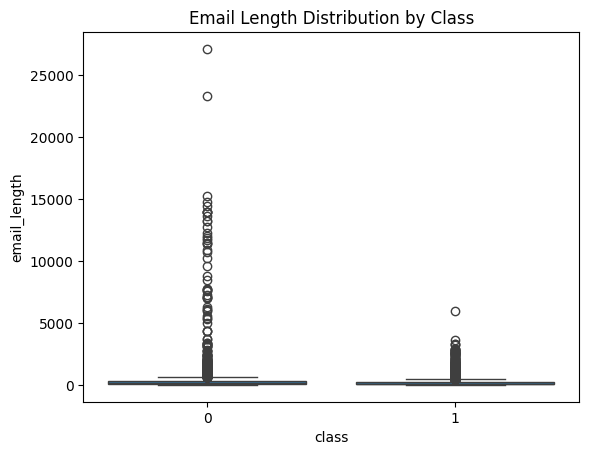

In [18]:
# Email length analysis
train_dataset['email_length'] = train_dataset['cleaned email text'].apply(lambda x: len(x.split()))

sns.boxplot(x='class', y='email_length', data=train_dataset)
plt.title('Email Length Distribution by Class')
plt.show()


# Build the Spam Detection Model

### *Train the Logistic Regression Model*

In [19]:
lr_model = LogisticRegression()
lr_model.fit(tfidf_X_train, y_train)
lr_preds = lr_model.predict(tfidf_X_test)

### *Evaluate the Logistic Regression Model*

In [20]:
print(f'Accuracy of Logistic Regression: {accuracy_score(y_test, lr_preds):.4f}')
print(classification_report(y_test, lr_preds))

Accuracy of Logistic Regression: 0.9857
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1403
           1       0.98      1.00      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### *Confusion Matrix*

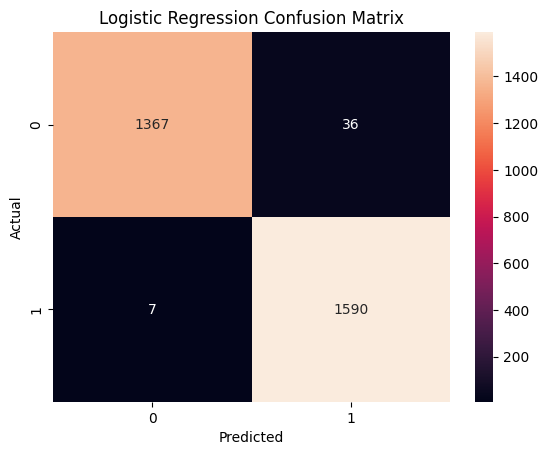

In [24]:

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm,annot=True, fmt = 'g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### *Train the Support Vector Machine*

In [25]:
# SVM
svm_model = SVC()
svm_model.fit(tfidf_X_train, y_train)
svm_preds = svm_model.predict(tfidf_X_test)



### *Evaluate the SVM model*


In [26]:
# Evaluate the model
print(f'Accuracy of SVM: {accuracy_score(y_test, svm_preds):.4f}')
print(classification_report(y_test, svm_preds))

Accuracy of SVM: 0.9900
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1403
           1       0.98      1.00      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### *Confusion Matrix*

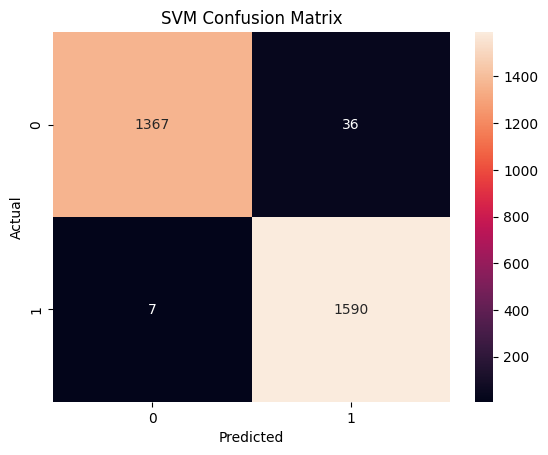

In [27]:
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm,annot=True, fmt = 'g')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### *Train the Random Forest Model*

In [28]:
# Random Forest
rfcl_model = RandomForestClassifier()
rfcl_model.fit(tfidf_X_train, y_train)
rfcl_preds = rfcl_model.predict(tfidf_X_test)

### *Evaluate the Random Forest Model*

In [29]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, rfcl_preds):.4f}')
print(classification_report(y_test, rfcl_preds))

Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1403
           1       0.97      0.99      0.98      1597

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



### *Confusion Matrix*

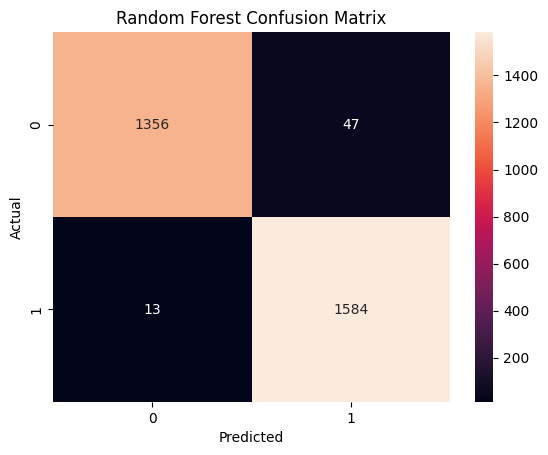

In [30]:
cm = confusion_matrix(y_test, rfcl_preds)
sns.heatmap(cm,annot=True, fmt = 'g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the **Logistic Regression** the Model with Test Dataset

In [31]:
# Preprocessing the test data
test_dataset['cleaned email text'] = test_dataset['email'].apply(clean_email_text)

In [32]:
# Feature extraction with TF-IDF
tfidf_X_test = tfidf_vectorizer.transform(test_dataset['cleaned email text'])

In [33]:
# Make the predictions on the test data
test_predict = lr_model.predict(tfidf_X_test)

In [34]:
# Convert numerical predictions back to original labels
test_predict_labels = label_encoder.inverse_transform(test_predict)

In [35]:
prediction_df = pd.DataFrame({
    'id_': test_dataset['id_'],
    'class': test_predict_labels
})

In [36]:
prediction_df

,id_,class
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,spam
1,cbe49c1c-b328-4716-9b78-9169c6111e80,spam
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,spam
3,b696569e-f7de-4771-9946-be5dd477b2f6,not_spam
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,spam
...,...,...
13539,c03b5042-4fbd-4756-86aa-7edd82777094,spam
13540,39841b62-79c2-4b9f-b00d-a72902490244,spam
13541,d5af0144-7b08-4695-8269-5b1507816b91,spam
13542,65735e11-cf67-4739-964e-67b1021c7153,spam


# Generate the submission csv files

In [38]:
prediction_df.to_csv('submission_<Shamim_Khaled>.csv', index=False)